## Data Description:

You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's species from a photo.

## Dataset:

The data file names are:
• images.npy
• Label.csv
Due to the large volume of data, the images were converted to images.npy file and the labels are also put into the Labels.csv.

### Reference:
 - Most of the methods are referred and reused from Case studies.

### **Importing the libraries**

In [102]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import cv2
import os
import tensorflow as tf
import keras
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_fscore_support,f1_score
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from sklearn.model_selection import train_test_split

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
# adds a nice background to the graphs
sns.set(color_codes=True) 
# To supress numerical display in scientific notations
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
sns.set_palette("pastel") # Set the palette to the "pastel"
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

IMG_SIZE = 128 # Defining Image size constant

### **Reading the Training Data**

In [2]:
# Storing all the training images
X_data = np.load('images.npy') 

# Get the Shape of train dataset
X_data.shape

(4750, 128, 128, 3)

In [3]:
#Storing all the training images
y_data = pd.read_csv("Labels.csv")

# Get the Shape of train label
print(y_data.shape)

(4750, 1)


### Observation 
- Images and Labels data rows are matching.

In [171]:
type(y_data)

pandas.core.frame.DataFrame

In [5]:
# Converting y_data into series for better analysis
y_label = y_data.iloc[:,0]

In [77]:
# Get all unique labesl into a list
CATEGORIES  = y_label.unique()
print(CATEGORIES)
CATEGORIES_NUM = len(CATEGORIES)

['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


### **Exploratory Data Analysis**

In [7]:
# Function to plot image.
def plotImage(img, title):
    '''
    Method to plot image based on give image and title
    '''
    plt.imshow(img, cmap='gray');
    plt.title(title);
    plt.axis('off')
    plt.show()

In [201]:
# Function to plot hostogram distribution of pixels
def plotHistogramValues(pic, title): 
    '''
    get Histogram plot for pixel for given image
    '''
    plt.figure(figsize=(10,7), edgecolor='blue')
    n, bins, patches = plt.hist(pic, bins=10, range=(0.0, 256.0))
    plt.xlabel('Pixel value')
    plt.ylabel('Number of Pixels')
    plt.title('Histogram of Pixel values for '+ title)
    plt.show()

In [203]:
# Function to find mean of a give label
def find_mean_img(full_mat, title):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((IMG_SIZE, IMG_SIZE))
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}-{len(full_mat)}')
    plt.axis('off')
    plt.show()
    return mean_img

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64

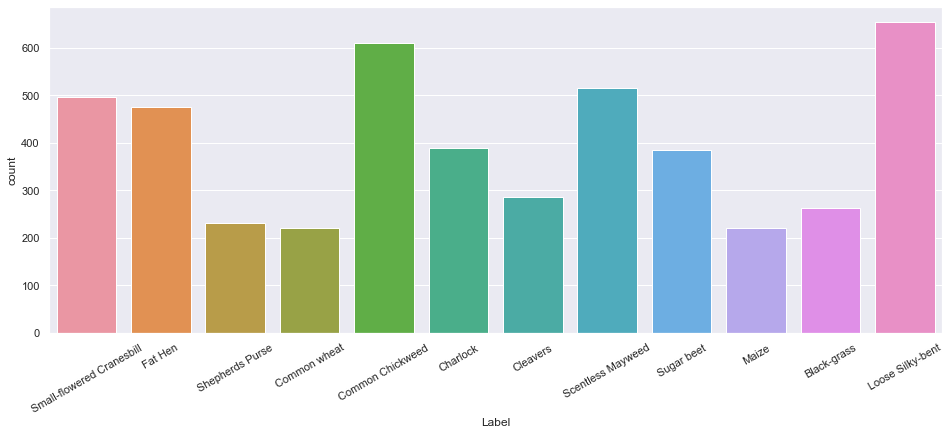

In [10]:
# count the image distribution of each label types 
fig=plt.figure(figsize=(16, 6))
plt.xticks(rotation=30)
g = sns.countplot(y_label)
y_label.value_counts()

### Collecting images of each seedlings types

In [45]:
# creating null array for each seedlings type
SmallFloweredCranesbill = []
FatHen = []
ShepherdsPurse = []
CommonWheat = []
CommonChickweed= []
Charlock = []
Cleavers = []
ScentlessMayweed = []
SugarBeet = []
Maize= []
BlackGrass= []
LooseSilkyBent= []
#Storing all the training images
training_data = []

# Looping through each of the category and creating array for each seedling types.
# As soon as image is found for a category inner loop will break and it will pick next image.
for idx, img in enumerate(X_data): 
        cat  = y_label[idx]
        # Converting image to greyscale to reduce the complexity and computation  
        img_array = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        training_data.append(img_array)
        if cat==CATEGORIES[0]: 
            SmallFloweredCranesbill.append([img_array])
        if cat==CATEGORIES[1]: 
            FatHen.append([img_array]) 
        if cat==CATEGORIES[2]: 
            ShepherdsPurse.append([img_array])
        if cat==CATEGORIES[3]:
            CommonWheat.append([img_array])
        if cat==CATEGORIES[4]: 
            CommonChickweed.append([img_array])
        if cat==CATEGORIES[5]: 
            Charlock.append([img_array])
        if cat==CATEGORIES[6]: 
            Cleavers.append([img_array])
        if cat==CATEGORIES[7]: 
            ScentlessMayweed.append([img_array])
        if cat==CATEGORIES[8]: 
            SugarBeet.append([img_array])
        if cat==CATEGORIES[9]: 
            Maize.append([img_array])
        if cat==CATEGORIES[10]: 
            BlackGrass.append([img_array])
        if cat==CATEGORIES[11]:
            LooseSilkyBent.append([img_array])



### Plotting image of Each types

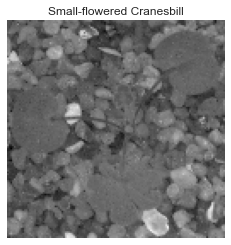

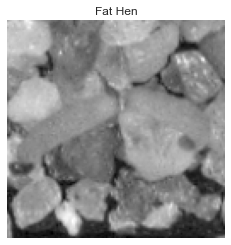

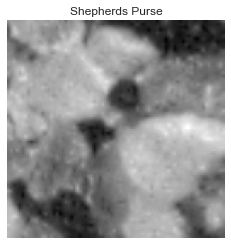

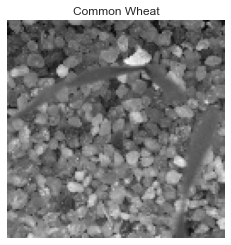

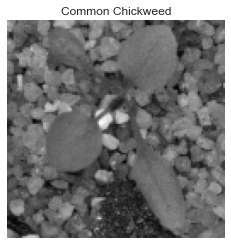

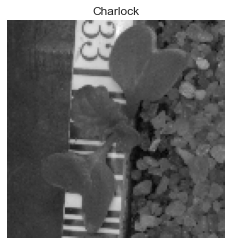

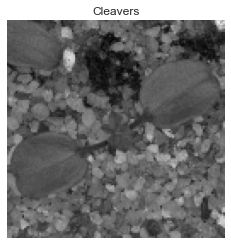

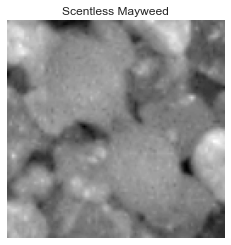

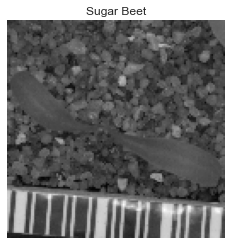

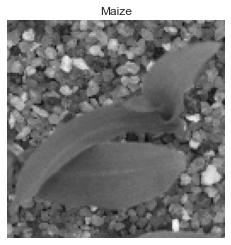

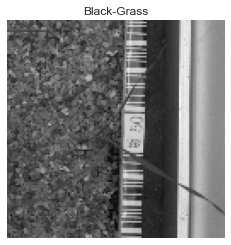

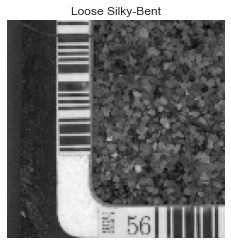

In [12]:
plotImage(np.array(SmallFloweredCranesbill)[1][0] , 'Small-flowered Cranesbill')
plotImage(np.array(FatHen)[1][0] , 'Fat Hen')
plotImage(np.array(ShepherdsPurse)[1][0] , 'Shepherds Purse')
plotImage(np.array(CommonWheat)[1][0] , 'Common Wheat')
plotImage(np.array(CommonChickweed)[1][0] , 'Common Chickweed')
plotImage(np.array(Charlock)[1][0] , 'Charlock')
plotImage(np.array(Cleavers)[1][0] , 'Cleavers')
plotImage(np.array(ScentlessMayweed)[1][0] , 'Scentless Mayweed')
plotImage(np.array(SugarBeet)[1][0] , 'Sugar Beet')
plotImage(np.array(Maize)[1][0] , 'Maize')
plotImage(np.array(BlackGrass)[1][0] , 'Black-Grass')
plotImage(np.array(LooseSilkyBent)[1][0] , 'Loose Silky-Bent')

### Plotting mean image for each seedling types

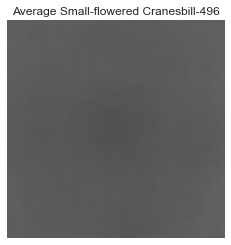

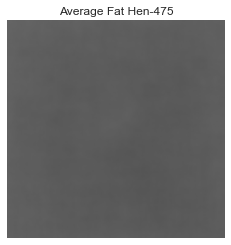

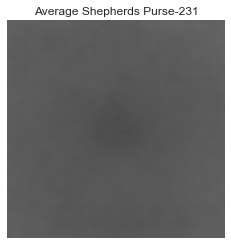

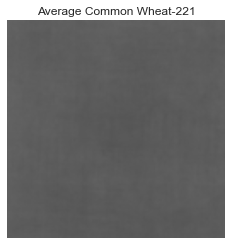

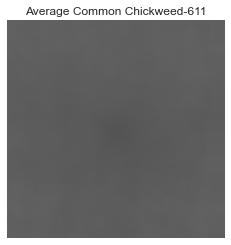

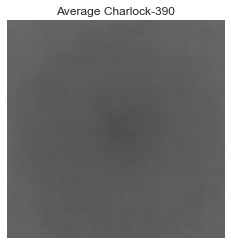

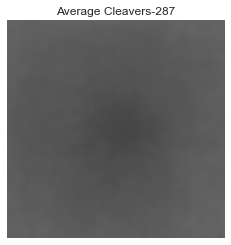

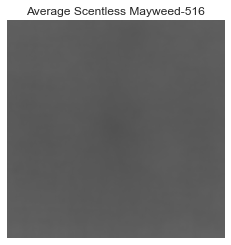

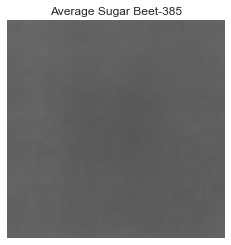

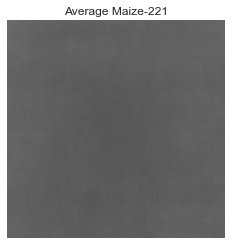

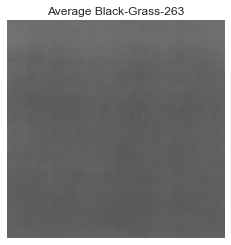

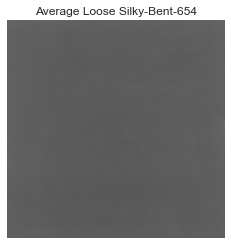

In [204]:
# Creating mean for each image category types 
 
SmallFloweredCranesbill_mean = find_mean_img(np.array(SmallFloweredCranesbill), 'Small-flowered Cranesbill')
FatHen_mean = find_mean_img(np.array(FatHen), 'Fat Hen')
ShepherdsPurse_mean = find_mean_img(np.array(ShepherdsPurse), 'Shepherds Purse')
CommonWheat_mean = find_mean_img(np.array(CommonWheat), 'Common Wheat')
CommonChickweed_mean = find_mean_img(np.array(CommonChickweed), 'Common Chickweed')
Charlock_mean = find_mean_img(np.array(Charlock), 'Charlock')
Cleavers_mean = find_mean_img(np.array(Cleavers), 'Cleavers')
ScentlessMayweed_mean = find_mean_img(np.array(ScentlessMayweed), 'Scentless Mayweed')
SugarBeet_mean = find_mean_img(np.array(SugarBeet), 'Sugar Beet')
Maize_mean = find_mean_img(np.array(Maize), 'Maize')
BlackGrass_mean = find_mean_img(np.array(BlackGrass), 'Black-Grass')
LooseSilkyBent_mean = find_mean_img(np.array(LooseSilkyBent), 'Loose Silky-Bent')

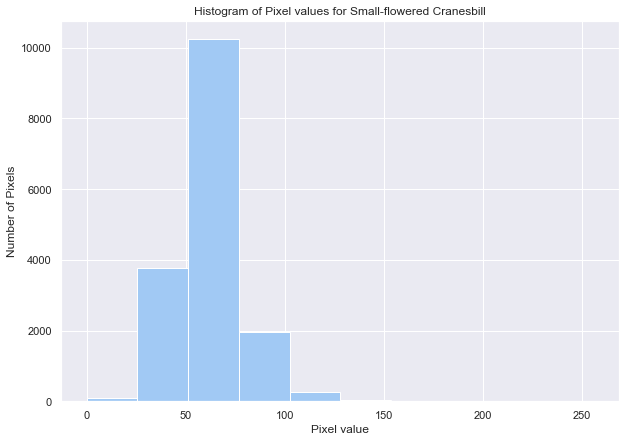

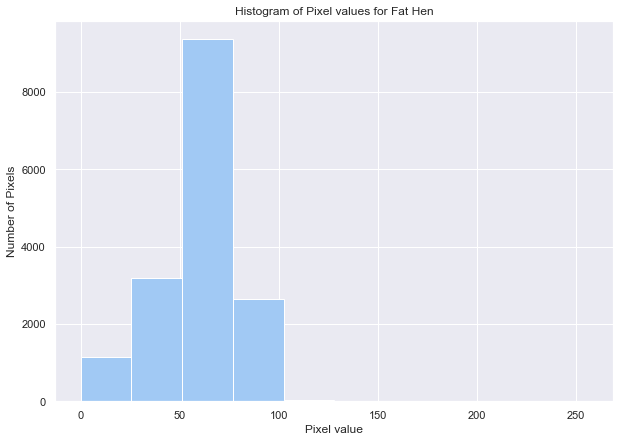

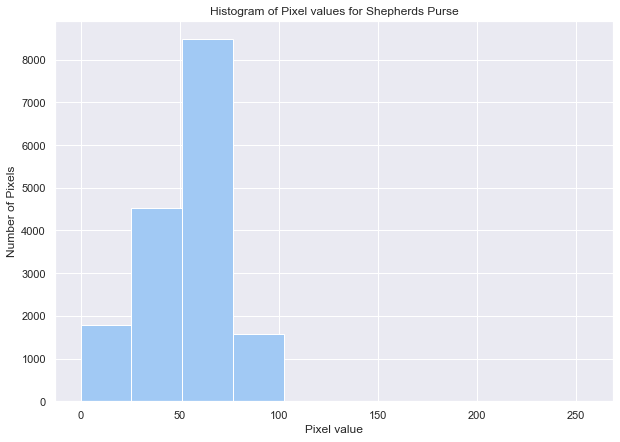

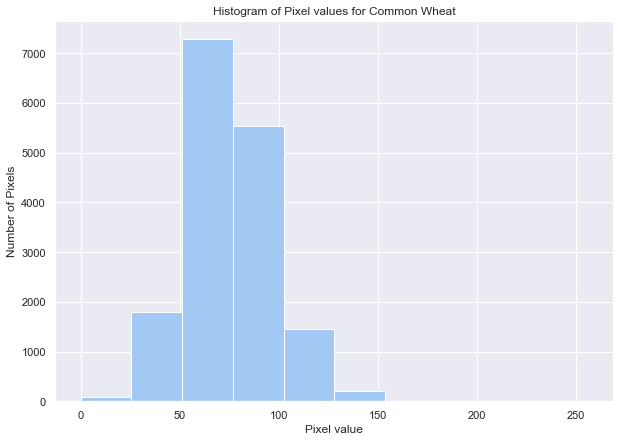

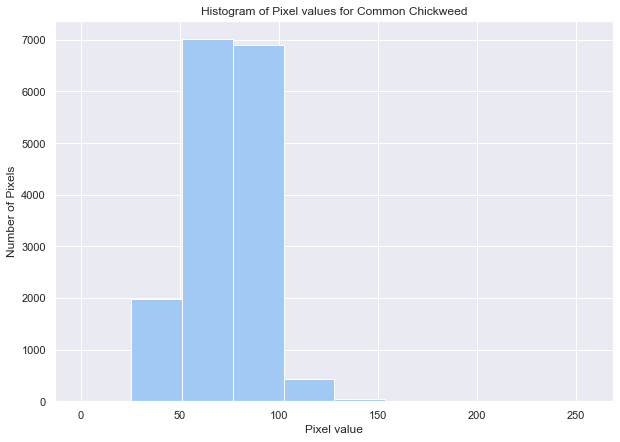

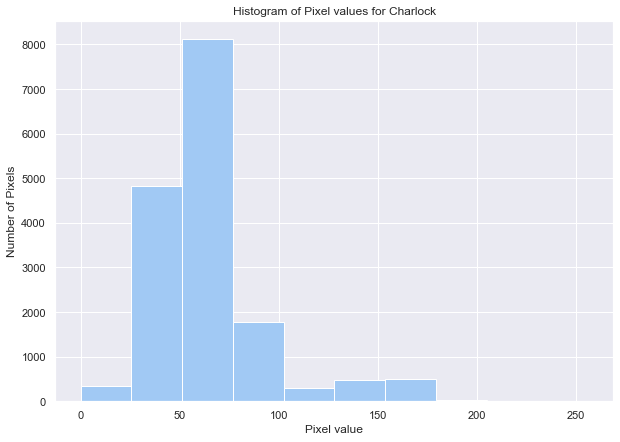

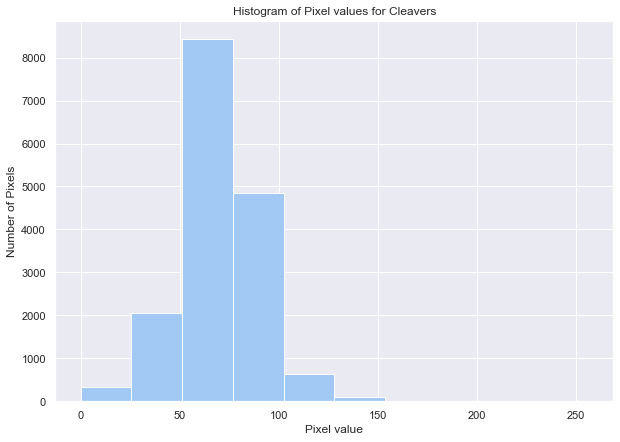

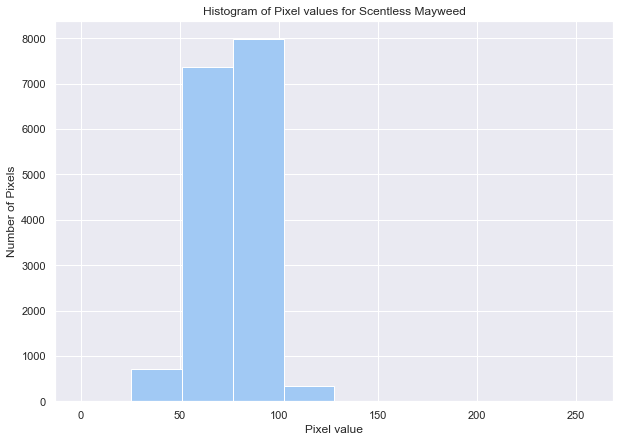

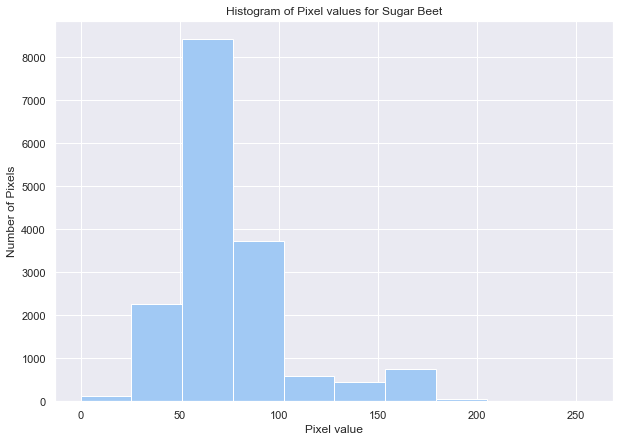

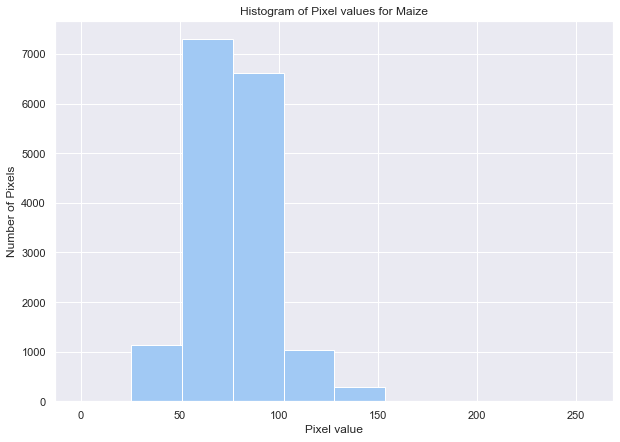

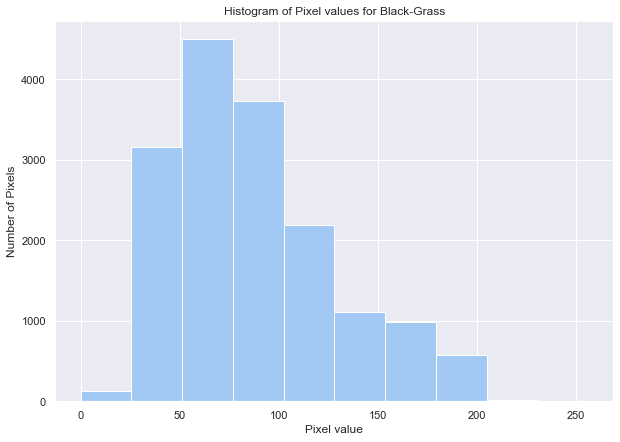

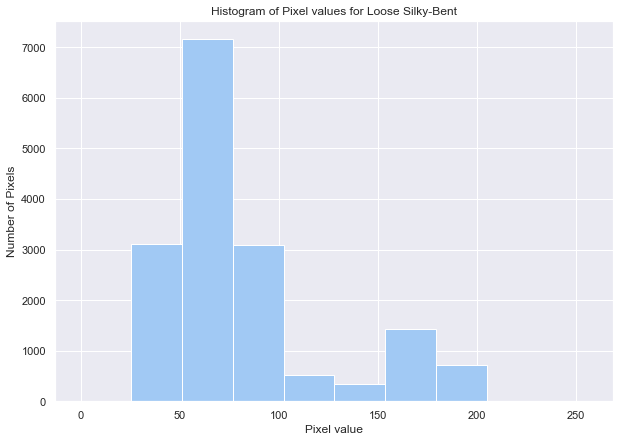

In [202]:
# Plotting pixel histogram for all image types , taking first image from each group
plotHistogramValues(np.array(SmallFloweredCranesbill)[1][0].ravel(), 'Small-flowered Cranesbill')
plotHistogramValues(np.array(FatHen)[1][0].ravel(), 'Fat Hen')
plotHistogramValues(np.array(ShepherdsPurse)[1][0].ravel(), 'Shepherds Purse')
plotHistogramValues(np.array(CommonWheat)[1][0].ravel(), 'Common Wheat')
plotHistogramValues(np.array(CommonChickweed)[1][0].ravel(), 'Common Chickweed')
plotHistogramValues(np.array(Charlock)[1][0].ravel(), 'Charlock')
plotHistogramValues(np.array(Cleavers)[1][0].ravel(), 'Cleavers')
plotHistogramValues(np.array(ScentlessMayweed)[1][0].ravel(), 'Scentless Mayweed')
plotHistogramValues(np.array(SugarBeet)[1][0].ravel(), 'Sugar Beet')
plotHistogramValues(np.array(Maize)[1][0].ravel(), 'Maize')
plotHistogramValues(np.array(BlackGrass)[1][0].ravel(), 'Black-Grass')
plotHistogramValues(np.array(LooseSilkyBent)[1][0].ravel(), 'Loose Silky-Bent')

### Insight on EDA
* Loose Silky-bent, Common Chickweed  and Scentless Mayweed are among the top three seedlings
* Shepherds Purse , Common wheat  and Maize  are lowest representation. Common wheat  and Maize and same number of samples.
* From above image we can see the most of the pixel intensity are between 0.1 to 0.5 ie. They are closer towards darker side
* For all labels , majority of seedlings pixel value are falling between 50-100 pixel range which indcates its darker image.
* Grey scale plot form each category is showing distinctively.
* Mean value of image from each category is not showing much details. it may be because average pixels for each category is in range 50-100 pixels.

# **Data Preprocessing** 

### Applying Gaussian Blurring to images

In [47]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
gaussian_blur = np.empty((4750, IMG_SIZE, IMG_SIZE)) 
gaussian_blur.shape

(4750, 128, 128)

In [48]:
# Now we apply the gaussian blur to each 28x28 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(training_data):
    gaussian_blur[idx]= cv2.GaussianBlur(img, (5, 5), 0)

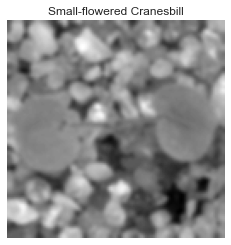

In [205]:
# Plot the de-noised image generated by applying Gaussian blur.
img_index = 0; # Plot image for first image.
plotImage(gaussian_blur[img_index], y_label[img_index]);

* We can see , after applying gaussian blur image is looking slightly blurred with respect to previously 
  plotted image during EDA.

### Applying Normalization to images
- We perform a grayscale normalization to reduce the effect of illumination's differences.

In [206]:
# Normalize the data
gaussian_blur = gaussian_blur.astype('float32') / 255.0
gaussian_blur = gaussian_blur.reshape(-1,IMG_SIZE,IMG_SIZE,1)

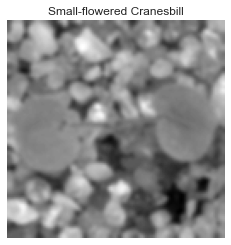

In [207]:
# Plot same image after normalization
plotImage(gaussian_blur[img_index], y_label[img_index])

* After applying normalization to Gaussian blur image. Plotted image still retails its features like before.

In [63]:
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(gaussian_blur, y_label, train_size=0.80, random_state=0)

In [64]:
type(X_train) # As we can see that the data to be fed into model is of the type numpy array.

numpy.ndarray

In [65]:
gaussian_blur.shape

(4750, 128, 128, 1)

In [66]:
X_train.shape

(3800, 128, 128, 1)

###  one hot encoding 

In [67]:
label_encoder = LabelEncoder()

code = np.array(y_train)
vec_train = label_encoder.fit_transform(code)
y_train =  to_categorical(vec_train)

code = np.array(y_test)
vec_test = label_encoder.fit_transform(code)
y_test = to_categorical((vec_test))

In [221]:
print(y_train.shape)
print(y_test.shape)

(3800, 12)
(950, 12)


## **Model Building** 

#### **Convolutional Neural Network (CNN)**.  We'll build different models and analyse each one of them.

In [70]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit(X_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=30, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  



Epoch 1/30
48/48 [==============================] - 295s 6s/step - loss: 2.4438 - accuracy: 0.1247 - val_loss: 2.4109 - val_accuracy: 0.1474

Epoch 00001: val_accuracy improved from -inf to 0.14737, saving model to best_model.h5
Epoch 2/30
48/48 [==============================] - 301s 6s/step - loss: 2.4239 - accuracy: 0.1391 - val_loss: 2.4052 - val_accuracy: 0.1237

Epoch 00002: val_accuracy did not improve from 0.14737
Epoch 3/30
48/48 [==============================] - 305s 6s/step - loss: 2.4224 - accuracy: 0.1385 - val_loss: 2.4038 - val_accuracy: 0.1474

Epoch 00003: val_accuracy did not improve from 0.14737
Epoch 4/30
48/48 [==============================] - 314s 7s/step - loss: 2.4222 - accuracy: 0.1372 - val_loss: 2.4077 - val_accuracy: 0.1474

Epoch 00004: val_accuracy did not improve from 0.14737
Epoch 5/30
48/48 [==============================] - 311s 6s/step - loss: 2.4212 - accuracy: 0.1342 - val_loss: 2.4016 - val_accuracy: 0.1237

Epoch 00005: val_accuracy did not impr

CNN Model 1 does not appear to have good test accuracy and appears to be overfitting on the training dataset, 

We'll try CNN Model 2, which has a different architecture that should generalize well and not overfit.

**CNN Model 2:** CNN with Dropout after Convolution and having two Dense layers with 16 & 8 units respectively 

In [71]:
class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

In [78]:
lr = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model_ln2 = LNmodel(in_shape, [8,16], [16,8], kernelsize, CATEGORIES_NUM, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 128, 128, 8)       208       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 128, 128, 8)       0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 64, 64, 16)        3216      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 64, 64, 16)        0   

In [79]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln2 = model_ln2.fit(X_train, y_train, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=256,
                                  shuffle=True, epochs=60,callbacks=[es,mc])

Epoch 1/60
14/14 [==============================] - 41s 3s/step - loss: 2.4794 - accuracy: 0.0871 - val_loss: 2.4728 - val_accuracy: 0.1342

Epoch 00001: val_accuracy improved from -inf to 0.13421, saving model to best_model.h5
Epoch 2/60
14/14 [==============================] - 40s 3s/step - loss: 2.4742 - accuracy: 0.1035 - val_loss: 2.4715 - val_accuracy: 0.1342

Epoch 00002: val_accuracy did not improve from 0.13421
Epoch 3/60
14/14 [==============================] - 42s 3s/step - loss: 2.4713 - accuracy: 0.1243 - val_loss: 2.4595 - val_accuracy: 0.1342

Epoch 00003: val_accuracy did not improve from 0.13421
Epoch 4/60
14/14 [==============================] - 39s 3s/step - loss: 2.4670 - accuracy: 0.1187 - val_loss: 2.4593 - val_accuracy: 0.1316

Epoch 00004: val_accuracy did not improve from 0.13421
Epoch 5/60
14/14 [==============================] - 42s 3s/step - loss: 2.4630 - accuracy: 0.1240 - val_loss: 2.4487 - val_accuracy: 0.1316

Epoch 00005: val_accuracy did not improve f

Although model is not overfitting but model **does not have a good test accuracy,**. we need to increase the complexity of the model in our next attempt.

#### **Convolutional Neural Network (CNN)** 

**Model 3:** CNN with Dropout after Convolution and having two Dense layers with 512 & 256 Units respectively 

In [80]:
lr = 0.001
kernelsize = 5
model_ln3 = LNmodel(in_shape, [8,16], [512,256], kernelsize,CATEGORIES_NUM, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 128, 128, 8)       208       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 128, 128, 8)       0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 64, 64, 16)        3216      
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 64, 64, 16)        0   

In [208]:

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln3 = model_ln3.fit(X_train, y_train, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=512, 
                                  shuffle=True, epochs=40,callbacks=[es,mc])

Epoch 1/40
7/7 [==============================] - 48s 7s/step - loss: 2.4181 - accuracy: 0.1418 - val_loss: 2.3897 - val_accuracy: 0.1316

Epoch 00001: val_accuracy improved from -inf to 0.13158, saving model to best_model.h5
Epoch 2/40
7/7 [==============================] - 46s 7s/step - loss: 2.4185 - accuracy: 0.1383 - val_loss: 2.3886 - val_accuracy: 0.1316

Epoch 00002: val_accuracy did not improve from 0.13158
Epoch 3/40
7/7 [==============================] - 42s 6s/step - loss: 2.4166 - accuracy: 0.1398 - val_loss: 2.3889 - val_accuracy: 0.1316

Epoch 00003: val_accuracy did not improve from 0.13158
Epoch 4/40
7/7 [==============================] - 43s 6s/step - loss: 2.4179 - accuracy: 0.1418 - val_loss: 2.3884 - val_accuracy: 0.1316

Epoch 00004: val_accuracy did not improve from 0.13158
Epoch 5/40
7/7 [==============================] - 43s 6s/step - loss: 2.4187 - accuracy: 0.1377 - val_loss: 2.3885 - val_accuracy: 0.1316

Epoch 00005: val_accuracy did not improve from 0.1315

This model too also **does not have a good test accuracy,** like previous model.

### **Plotting the Train & Test Accuracy**

In [88]:
# Method to plot Train and Test accuracy
def plotTrainTestAccuracy(hist):
    print(hist.history.keys())
    # summarize history for accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


**CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


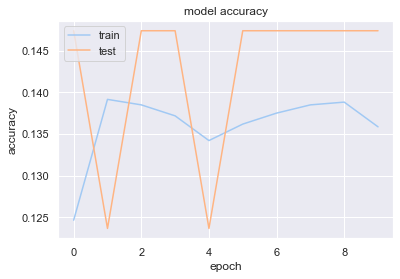

In [211]:
plotTrainTestAccuracy(history);

* For Model 1, Plot is not showing good accuracy result. 

**CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


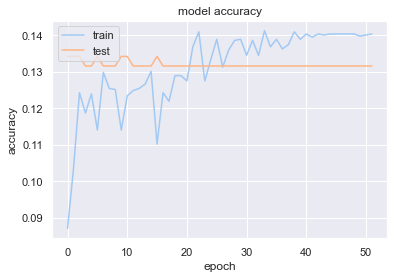

In [90]:
plotTrainTestAccuracy(history_model_ln2)

* For Model 2, train accuracy is improving but test accuracy is consant after 18th epoch.

**CNN Model 3**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


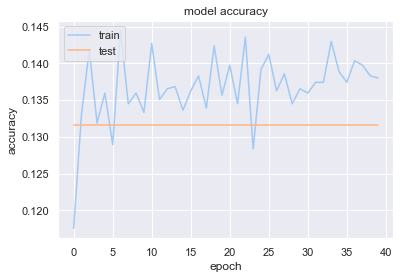

In [91]:
plotTrainTestAccuracy(history_model_ln3)

* For Model 3, train accuraacy remain within same range  but test accuracy is constant throughout.

### **Model Evaluation**

**CNN Model 1**

In [94]:
model.evaluate(X_test,y_test)

30/30 [==============================] - 29s 966ms/step - loss: 2.4273 - accuracy: 0.1305


[2.427304983139038, 0.1305263191461563]

**CNN Model 2**

In [96]:
model_ln2.evaluate(X_test,y_test)

30/30 [==============================] - 3s 96ms/step - loss: 2.4265 - accuracy: 0.1305


[2.426530122756958, 0.1305263191461563]

**CNN Model 3**

In [213]:
model_ln3.evaluate(X_test,y_test)

30/30 [==============================] - 3s 105ms/step - loss: 2.4301 - accuracy: 0.1305


[2.4300742149353027, 0.1305263191461563]

Unfortunately, **we cannot decide the best model based on test accuracy here** because we are dealing with an imbalanced dataset, so we are more concerned with **Precision and Recall**. Since these two metrics are both quite important in this scenario, we will also check the **F1 score** to try to achieve a good balance between Precision and Recall. 

### **Plotting the confusion matrix for the two best models** 

As we can see, **Model 2 and Model 3 seem to be generalizing well** because they both have a good Holdout set Accuracy. **Let us compute the confusion matrix** for these two models to understand the distribution of True Positives, False Positives, False Negatives and True Negatives.

In [97]:
# Function to predict test and accuracy for given model

def test_predict(model):
    y_test_pred= model.predict(X_test)
    y_test_pred_classes = np.argmax(y_test_pred, axis=1)
    y_test_pred_prob = np.max(y_test_pred, axis=1)
    return y_test_pred_classes
    

In [214]:
# Function to accuracy for given class
def test_accuracy(pred_class):
    return accuracy_score(np.argmax(y_test,axis=1), pred_class)

In [136]:
# Function to create confusion matrix
def plot_Confusion_matrix(pred_class):
    cf_matrix = confusion_matrix(np.argmax(y_test,axis=1), pred_class)

    # Confusion matrix normalized per category true value
    cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
    plt.figure(figsize=(8,6))
    sns.heatmap(cf_matrix_n1, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True)

**CNN Model 2**

In [133]:
y_test_pred_classes_model2 = test_predict(model_ln2)
test_accuracy(y_test_pred_classes_model2)

0.13052631578947368

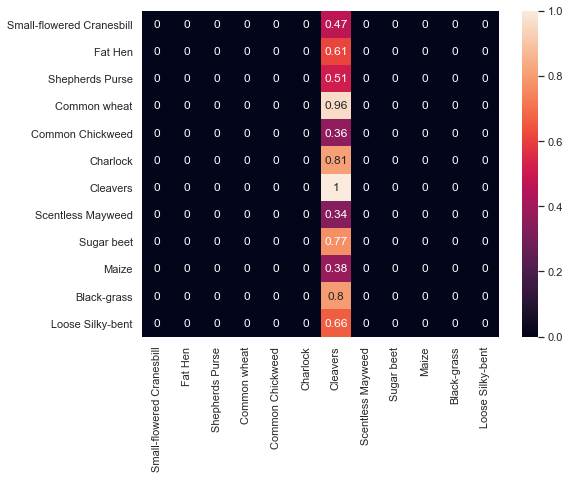

In [137]:
plot_Confusion_matrix(y_test_pred_classes_model2)

**CNN Model 3**

In [142]:
y_test_pred_classes_model3 = test_predict(model_ln3)
test_accuracy(y_test_pred_classes_model3)

0.13052631578947368

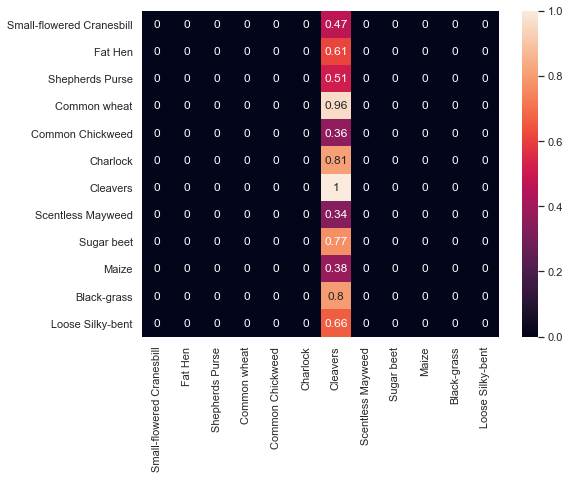

In [143]:
plot_Confusion_matrix(y_test_pred_classes_model3)

The above two confusion matrices doesn't displays much information and model seems to be not working as expected. **Let's calculate the F1 score** (the harmonic mean of precision and recall), which is used as an evaluation metric for imbalanced datasets.

**CNN Model 2**

In [149]:
def precision_recall_score(y_test_pred_classes):
    p=precision_recall_fscore_support(np.argmax(y_test,axis=1), y_test_pred_classes, average=None,labels=list(np.unique(y_test)))
    print(" Precision is {}\n Recall is {} \n f_beta Score is {}".format(p[0],p[1],p[2]))

In [223]:
precision_recall_score(y_test_pred_classes_model2)

 Precision is [0. 0.]
 Recall is [0. 0.] 
 f_beta Score is [0. 0.]


**CNN Model 3**

In [216]:
precision_recall_score(y_test_pred_classes_model3)

 Precision is [0. 0.]
 Recall is [0. 0.] 
 f_beta Score is [0. 0.]


**Observation**

As we see for both model 2 model and model 3 we are not geeting 0 scores foe precision and recall score. Which means model will not accurately identify the in all scenario.

### **Weighted F-Score**

**Model 2**

In [158]:
f1_score(np.argmax(y_test,axis=1), y_test_pred_classes_model2, average='weighted')

0.03014015485641478

**Model 2**

In [159]:
f1_score(np.argmax(y_test,axis=1), y_test_pred_classes_model3, average='weighted')

0.03014015485641478

Model 3 with 2 Dense layer and more  number of units having better F1 score.

### **Prediction**

Let us predict with best model with is model_ln2 and model_ln3 

Fat Hen


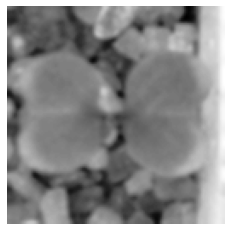

In [168]:
plt.imshow(X_test[1].reshape(IMG_SIZE,IMG_SIZE), cmap='Greys_r')
i=y_test[1]
i=np.argmax(i)
if(i == 0):
    print('Small-flowered Cranesbill')
if(i==1):
    print('Fat Hen')
if(i==2):
    print('Shepherds Purse')
if(i==3):
    print('Common wheat')
if(i == 4):
    print('Common Chickweed')
if(i==5):
    print('Charlock')
if(i==6):
    print('Cleavers')
if(i==7):
    print('Scentless Mayweed')
if(i ==8):
    print('Sugar beet')
if(i==9):
    print('Maize')
if(i==10):
    print('Black-grass')
if(i==11):
    print('Loose Silky-bent')

plt.axis('off')
plt.show()

In [229]:
def get_seedlings(prediction):
    np.argmax(res3)

    if(i == 0):
        print('Small-flowered Cranesbill')
    if(i==1):
        print('Fat Hen')
    if(i==2):
        print('Shepherds Purse')
    if(i==3):
        print('Common wheat')
    if(i == 4):
        print('Common Chickweed')
    if(i==5):
        print('Charlock')
    if(i==6):
        print('Cleavers')
    if(i==7):
        print('Scentless Mayweed')
    if(i ==8):
        print('Sugar beet')
    if(i==9):
        print('Maize')
    if(i==10):
        print('Black-grass')
    if(i==11):
        print('Loose Silky-bent')

In [230]:
res2=model_ln2.predict(X_test[1].reshape(1,IMG_SIZE,IMG_SIZE,1))
get_seedlings(res2)

Cleavers


In [231]:
res3=model_ln3.predict(X_test[1].reshape(1,IMG_SIZE,IMG_SIZE,1))
get_seedlings(res3)

Cleavers


### **Conclusion**

As we have seen, both the model is not able to predict the correct seedlings and therefore failed to accurately identify the image and cant be considered  reliable model.
**There is scope for improvement in the test accuracy and F1 score of the CNN model** chosen here. **Different architectures** can be built and **hyperparamter tuning** can be performed to obtain better result.
We can visualize the filters  and understand why the model does not do well in the identification of correct seedlings.
